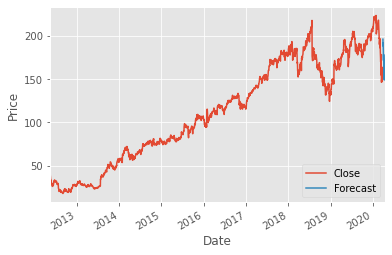

In [66]:
import pandas as pd
import datetime as dt
import math
import numpy as np

import yfinance as yf
from nsepy import get_history
import pandas_datareader.data as web

from sklearn import preprocessing, svm
import sklearn.model_selection as skms
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


start = dt.datetime(2000,1,1)
end = dt.datetime.now()
df = web.DataReader('FB', 'yahoo', start, end)
#df = get_history("SBIN", start, end)


#volatility;;percentage change
df['HL_PCT'] = ( (df['High']-df['Close']) / df['Close'] ) * 100
df['PCT_change'] = ( (df['Close']-df['Open']) / df['Open'] ) * 100
#needed attributes
df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]
forecast_col = 'Close'
df.fillna(-99999,inplace = True) #making them an outlier

forecast_out = int(math.ceil(0.01*len(df))) ##last ten days
#print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)


#features apart from label;;CAPITAL X
X = np.array(df.drop(['label'],1)) #returns a new df
X = preprocessing.scale(X)
X = X[:-forecast_out]


X_lately = X[-forecast_out:]


df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

X_train, X_test, y_train, y_test = skms.train_test_split(X,y,test_size = 0.2)

clf = LinearRegression(n_jobs = -1) #runs as many jobs at a time as possible
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
#print(accuracy)
#clf2 = svm.SVR()
#clf2.fit(X_train,y_train)
#accuracy2 = clf2.score(X_test,y_test)
#print(accuracy2)


forecast_set = clf.predict(X_lately)

#print(forecast_set, accuracy, forecast_out)
df['Forecast'] = np.nan

##for x-axis date;; since we droped it for calculation
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = dt.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]   

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()




In [48]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime.now()


#TSLA is a ticker
#df is a dataframe basicly a spreadsheet
df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.tail(6))

#ADJ close is adjusted close for stock split;;every stock you have is now worth 2



                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-04-17  774.950012  747.659973  772.280029  753.890015  13128200   
2020-04-20  765.570007  712.210022  732.700012  746.359985  14746600   
2020-04-21  753.330017  673.789978  730.119995  686.719971  20209100   
2020-04-22  734.000000  688.710022  703.979980  732.109985  14224800   
2020-04-23  734.000000  703.130005  727.599976  705.630005  13236700   
2020-04-24  730.729980  698.179993  710.809998  725.150024  13212000   

             Adj Close  
Date                    
2020-04-17  753.890015  
2020-04-20  746.359985  
2020-04-21  686.719971  
2020-04-22  732.109985  
2020-04-23  705.630005  
2020-04-24  725.150024  


In [26]:
##P2

#TSLA is a ticker
#df is a dataframe basicly a spreadsheet
df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.tail(6))

df.to_csv('tsla.csv')

                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-04-17  774.950012  747.659973  772.280029  753.890015  13128200   
2020-04-20  765.570007  712.210022  732.700012  746.359985  14746600   
2020-04-21  753.330017  673.789978  730.119995  686.719971  20209100   
2020-04-22  734.000000  688.710022  703.979980  732.109985  14224800   
2020-04-23  734.000000  703.130005  727.599976  705.630005  13236700   
2020-04-24  730.729980  698.179993  710.809998  725.150024  13212000   

             Adj Close  
Date                    
2020-04-17  753.890015  
2020-04-20  746.359985  
2020-04-21  686.719971  
2020-04-22  732.109985  
2020-04-23  705.630005  
2020-04-24  725.150024  


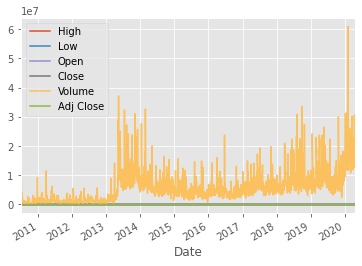

In [47]:
##P2

df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

#print(df.head())
df.plot() ##its like a dictionary
plt.show()

             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


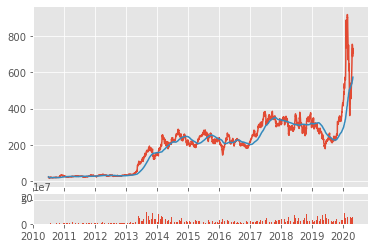

In [57]:
##P3
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods = 0).mean()   ##moving average;;intial elements will have nan
#df.dropna(inplace=True)#modified it
#print(df.head())

##Graphing with matplotlib
ax1 = plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan=1)##row,col;;start
ax2 = plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan=1, sharex=ax1)##row,col;;start

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [ ]:
##P4
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

##Graphing with matplotlib
ax1 = plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan=1)##row,col;;start
ax2 = plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan=1, sharex=ax1)##row,col;;start

plt.show()

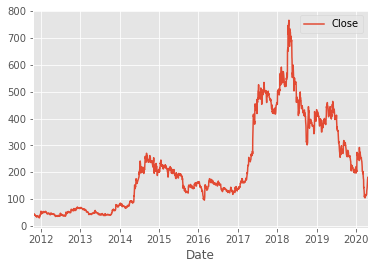

In [65]:
##indian stock
from nsepy import get_history
import datetime as dt
start = dt.datetime(2000,1,1)
end = dt.datetime.now()
data = get_history("SHAKTIPUMP", start, end)
data[['Close']].plot()